In [126]:
# All Imports
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
# Connect binance
binance = ccxt.binance()
ftx = ccxt.ftx()



In [128]:
# markets = binance.load_markets()

In [129]:
# Fetching Ticker
btc_ticker = binance.fetch_ticker('BTC/USDT')


In [130]:
# Fetching OHLCV
binance_btc_usdt_ohlcv = binance.fetch_ohlcv('BTC/USDT','1d',limit=100)
ftx_btc_usdt_ohlcv = ftx.fetch_ohlcv('BTC/USDT','1d',limit=100)


In [131]:
df_binance = pd.DataFrame(binance_btc_usdt_ohlcv, columns=['ts', 'o', 'h', 'l', 'c', 'v'])
df_ftx = pd.DataFrame(ftx_btc_usdt_ohlcv, columns=['ts', 'o', 'h', 'l', 'c', 'v'])

df_binance.ts = pd.to_datetime(df_binance.ts, unit='ms')
df_ftx.ts = pd.to_datetime(df_ftx.ts, unit='ms') 

In [132]:
df_ftx.head(2)

,ts,o,h,l,c,v
0,2021-07-16,31879.0,32241.0,31032.0,31386.0,5.545045e+07
1,2021-07-17,31386.0,31960.0,31175.0,31520.0,2.692989e+07


In [133]:
df_binance.head(2)

,ts,o,h,l,c,v
0,2021-07-16,31874.49,32249.18,31020.00,31383.87,48499.864154
1,2021-07-17,31383.86,31955.92,31164.31,31520.07,34012.242132


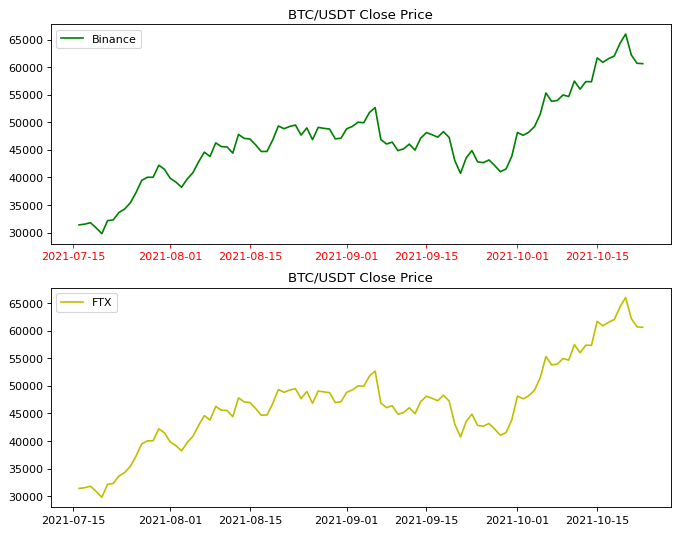

In [134]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8), dpi=80)
ax1.plot(df_binance['ts'], df_binance['c'],label='Binance',color='g')
ax2.plot(df_ftx['ts'], df_ftx['c'],label='FTX',color='y')
ax1.set_title('BTC/USDT Close Price')
ax2.set_title('BTC/USDT Close Price')
ax1.legend()
ax2.legend()
ax1.tick_params(axis='x', colors='red')
plt.show()

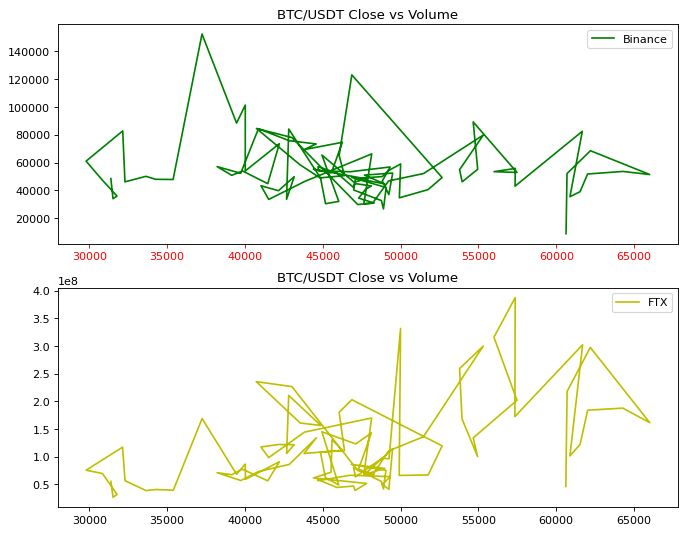

In [135]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8), dpi=80)
ax1.plot(df_binance['c'], df_binance['v'],label='Binance',color='g')
ax2.plot(df_ftx['c'], df_ftx['v'],label='FTX',color='y')
ax1.set_title('BTC/USDT Close vs Volume')
ax2.set_title('BTC/USDT Close vs Volume')
ax1.legend()
ax2.legend()
ax1.tick_params(axis='x', colors='red')
plt.show()

In [136]:
orderbook_binance_btc_usdt = binance.fetch_order_book('BTC/USDT')
orderbook_ftx_btc_usdt = ftx.fetch_order_book('BTC/USDT')

bids_binance = orderbook_binance_btc_usdt['bids']
asks_binanace = orderbook_binance_btc_usdt['asks']

df_bid_binance = pd.DataFrame(bids_binance, columns=['price','qty'])
df_ask_binance = pd.DataFrame(asks_binanace, columns=['price','qty'])


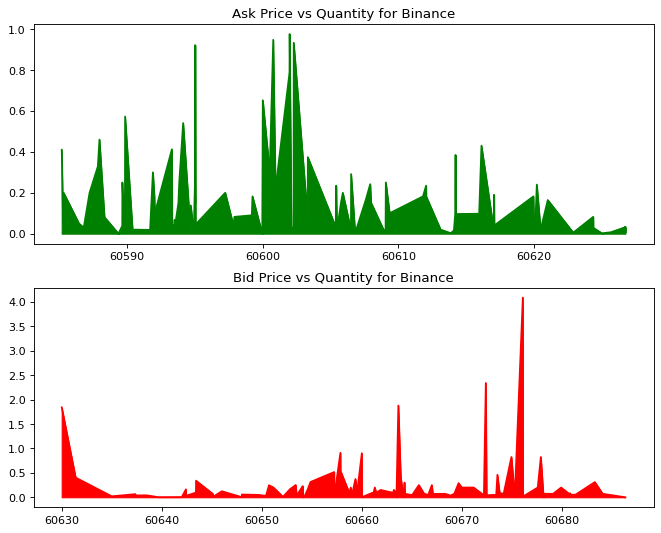

In [137]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 8), dpi=80)

ax1.plot(df_bid_binance['price'], df_bid_binance['qty'],label='Binance',color='g')
ax1.fill_between(df_bid_binance['price'], df_bid_binance['qty'],color='g')

ax2.plot(df_ask_binance['price'], df_ask_binance['qty'],label='FTX',color='r')
ax2.fill_between(df_ask_binance['price'], df_ask_binance['qty'],color='r')

ax1.set_title('Ask Price vs Quantity for Binance')
ax2.set_title('Bid Price vs Quantity for Binance')
plt.show()